In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,KYC_Verified,Region_Code,Previously_Onboarded,Account_Tenure,Is_Fraud,Avg_Txn_Amt,Payment_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152.0,39,0


* id: Unique ID for the customer
* Gender: Gender of the customer
* Age: Age of the customer
* KYC_Verified: [1 : Customer’s KYC is verified, 0 : Customer’s KYC is not verified]
* Region_Code: Unique code for the customer’s region (Area code)
* Previously_Onboarded: [1 : Customer was previously onboarded with the platform, 0 : Customer was not onboarded before]
* Account_Tenure: Duration (in months/years) of how long the customer has maintained an account with the platform
* Is_Fraud: [1 : Customer has a history of fraudulent transactions, 0 : No fraud history]
* Avg_Txn_Amt: Average transaction amount of the customer over a given period
* Payment_Channel: Mode of payment used by the customer (e.g., UPI, Debit Card, NetBanking, etc.)
* Vintage: Number of days the customer has been associated with the fintech platform
* Response: [1 : Customer opted in / active, 0 : Customer did not opt in / inactive]


* Our application collects customer details as input and applies machine learning to predict whether the customer is likely to be interested in and use our payment service, represented as 1 (Yes) or 0 (No) in the Response column.

## EDA

In [3]:
df.shape

(381109, 12)

In [4]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
KYC_Verified            0
Region_Code             0
Previously_Onboarded    0
Account_Tenure          0
Is_Fraud                0
Avg_Txn_Amt             0
Payment_Channel         0
Vintage                 0
Response                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   KYC_Verified          381109 non-null  int64  
 4   Region_Code           381109 non-null  int64  
 5   Previously_Onboarded  381109 non-null  int64  
 6   Account_Tenure        381109 non-null  object 
 7   Is_Fraud              381109 non-null  object 
 8   Avg_Txn_Amt           381109 non-null  float64
 9   Payment_Channel       381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,KYC_Verified,Region_Code,Previously_Onboarded,Avg_Txn_Amt,Payment_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
# checking distribution for target column
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

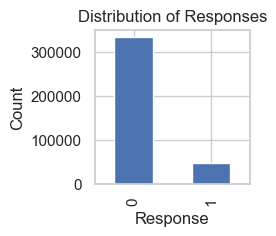

In [8]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(2, 2))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

# Show the plot
plt.show()

<Axes: >

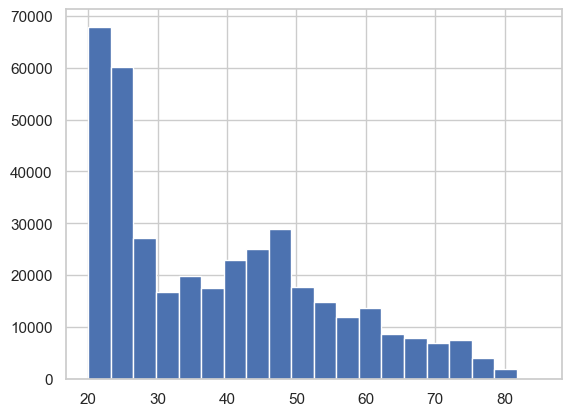

In [9]:
# checking distribution for age col
df['Age'].hist(bins=20)

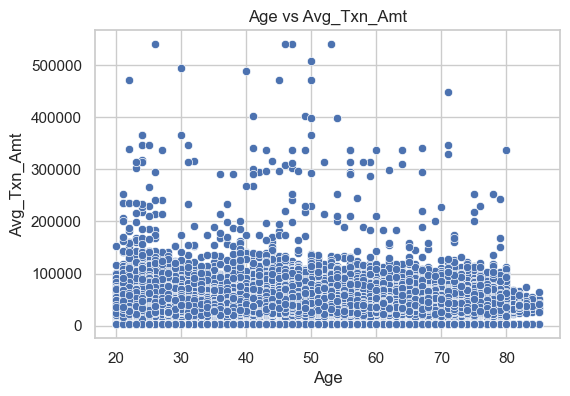

In [10]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Avg_Txn_Amt', data=df)
plt.title('Age vs Avg_Txn_Amt')
plt.xlabel('Age')
plt.ylabel('Avg_Txn_Amt')
plt.show()

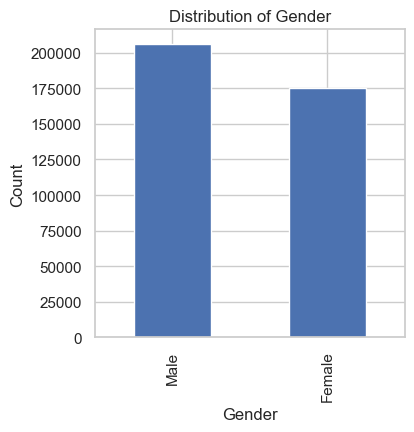

In [10]:
# Gender-Response comparison

value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

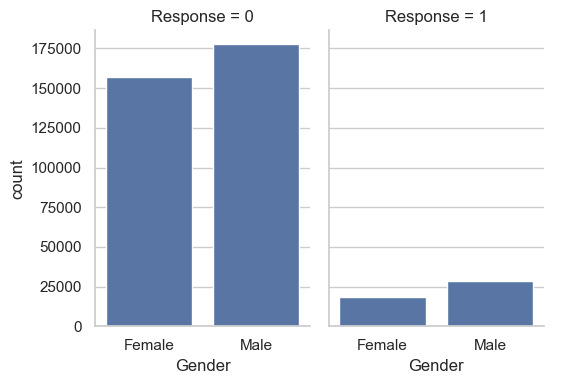

In [11]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

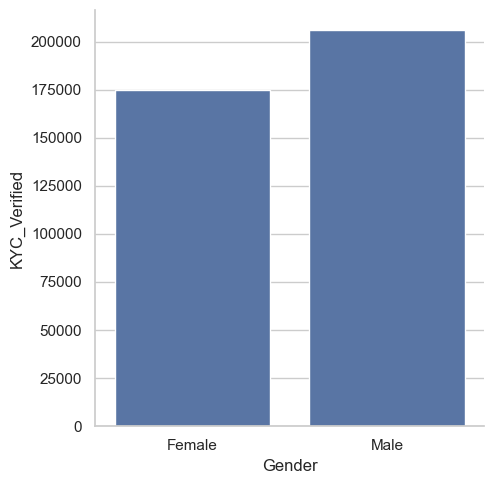

In [12]:
# KYC_Verified by gender

data=df.groupby(['Gender'])['KYC_Verified'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="KYC_Verified", data=data, kind="bar");

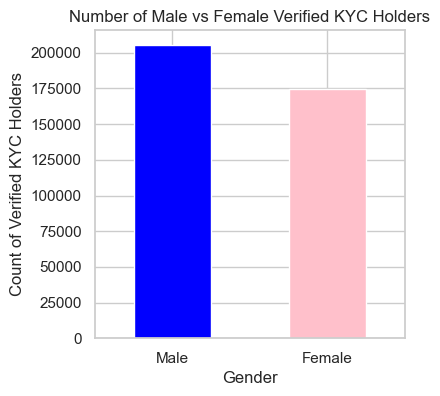

In [12]:
# Filter for only Verified KYC holders (KYC_Verified == 1)
verifiedkyc_holders = df[df['KYC_Verified'] == 1]

# Group by Gender and count the number of Verified KYC holders per gender
gender_counts = verifiedkyc_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female Verified KYC Holders')
plt.xlabel('Gender')
plt.ylabel('Count of Verified KYC Holders')
plt.xticks(rotation=0)
plt.show()


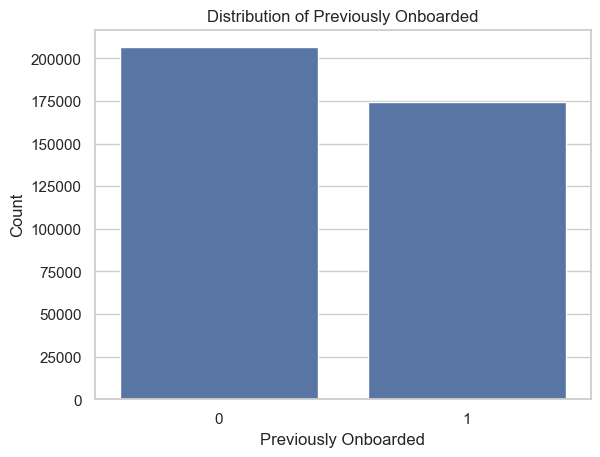

In [15]:
# customers with existing insurance

sns.countplot(x="Previously_Onboarded", data=df)
plt.title("Distribution of Previously Onboarded")
plt.xlabel("Previously Onboarded")
plt.ylabel("Count")
plt.show()

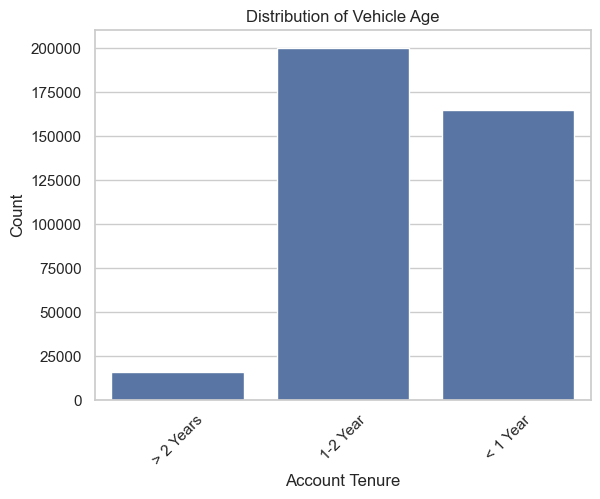

In [13]:
# checking account tenure dist

sns.countplot(x='Account_Tenure', data=df)
plt.xlabel('Account Tenure')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

In [14]:
# Response vs Account_Tenure

data=df.groupby(['Account_Tenure','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Account_Tenure,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


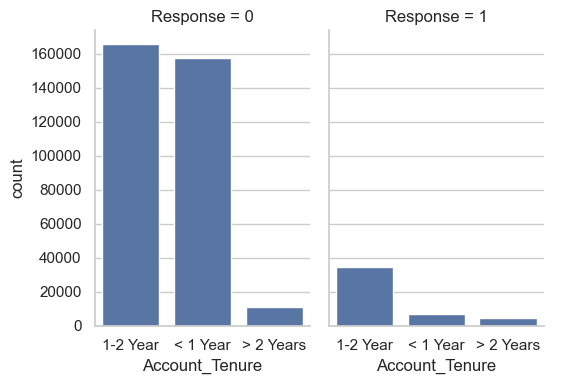

In [18]:
g = sns.catplot(x="Account_Tenure", y="count",col="Response",
                data=data, kind="bar",
                height=4, aspect=.7);

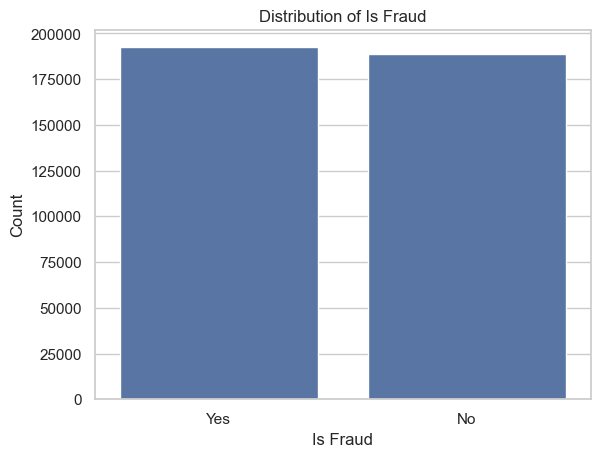

In [15]:
# dist for Is_Fraud col

sns.countplot(data=df, x='Is_Fraud')
plt.title('Distribution of Is Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

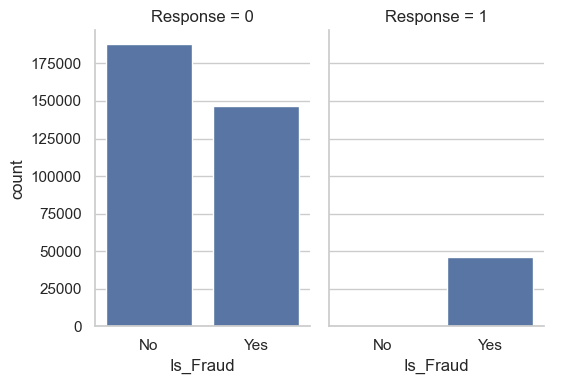

In [16]:
data = df.groupby(['Is_Fraud','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Is_Fraud", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

In [17]:
# checking stats for Avg_Txn_Amt
df['Avg_Txn_Amt'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Avg_Txn_Amt, dtype: float64

<Axes: >

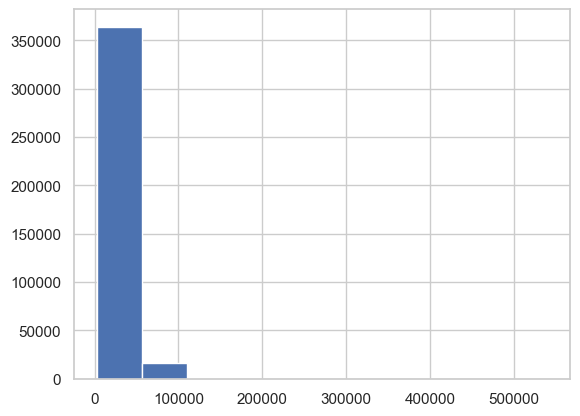

In [18]:
df['Avg_Txn_Amt'].hist(bins=10)

In [19]:
df[df['Avg_Txn_Amt']>200000]

,id,Gender,Age,KYC_Verified,Region_Code,Previously_Onboarded,Account_Tenure,Is_Fraud,Avg_Txn_Amt,Payment_Channel,Vintage,Response
1412,1413,Female,41,1,28,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28,0,1-2 Year,No,337573.0,26.0,239,0


## Data Preprocessing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   KYC_Verified          381109 non-null  int64  
 4   Region_Code           381109 non-null  int64  
 5   Previously_Onboarded  381109 non-null  int64  
 6   Account_Tenure        381109 non-null  object 
 7   Is_Fraud              381109 non-null  object 
 8   Avg_Txn_Amt           381109 non-null  float64
 9   Payment_Channel       381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 34.9+ MB


In [21]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'KYC_Verified', 'Previously_Onboarded', 'Account_Tenure_lt_1_Year',
'Account_Tenure_gt_2_Years','Is_Fraud_Yes','Region_Code','Payment_Channel']

In [22]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,KYC_Verified,Region_Code,Previously_Onboarded,Account_Tenure,Is_Fraud,Avg_Txn_Amt,Payment_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3,0,1-2 Year,No,33536.0,26.0,183,0


In [23]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
KYC_Verified >> int64
Region_Code >> int64
Previously_Onboarded >> int64
Account_Tenure >> object
Is_Fraud >> object
Avg_Txn_Amt >> float64
Payment_Channel >> float64
Vintage >> int64
Response >> int64


In [24]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,KYC_Verified,Region_Code,Previously_Onboarded,Avg_Txn_Amt,Payment_Channel,Vintage,Response,Account_Tenure_< 1 Year,Account_Tenure_> 2 Years,Is_Fraud_Yes
0,1,1,44,1,28,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3,0,33536.0,26.0,183,0,False,False,False


In [25]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
KYC_Verified >> int64
Region_Code >> int64
Previously_Onboarded >> int64
Avg_Txn_Amt >> float64
Payment_Channel >> float64
Vintage >> int64
Response >> int64
Account_Tenure_< 1 Year >> bool
Account_Tenure_> 2 Years >> bool
Is_Fraud_Yes >> bool


In [26]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Account_Tenure_< 1 Year": "Account_Tenure_lt_1_Year", "Account_Tenure_> 2 Years": "Account_Tenure_gt_2_Years"})
df['Account_Tenure_lt_1_Year'] = df['Account_Tenure_lt_1_Year'].astype('int')
df['Account_Tenure_gt_2_Years'] = df['Account_Tenure_gt_2_Years'].astype('int')
df['Is_Fraud_Yes'] = df['Is_Fraud_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [27]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Avg_Txn_Amt']] = mm.fit_transform(df[['Avg_Txn_Amt']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [28]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [31]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [29]:
train.head(1)

,Gender,Age,KYC_Verified,Region_Code,Previously_Onboarded,Avg_Txn_Amt,Payment_Channel,Vintage,Account_Tenure_lt_1_Year,Account_Tenure_gt_2_Years,Is_Fraud_Yes
0,1,0.333777,1,28,0,0.070366,26.0,0.748795,0,1,1


## Model Trainer - Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [4, 6, ...], 'min_samples_split': [5, 7, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,101
,error_score,nan


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# parameter grid with ranges (lists)
my_params = {
    'n_estimators': [100, 200, 300, 400],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5, 6],
    'max_depth': [5, 10, 15, None],
    'criterion': ['gini', 'entropy']
}

clf = RandomForestClassifier(random_state=101)

model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=my_params,
    n_iter=10,
    cv=4,
    verbose=1,
    random_state=101,
    n_jobs=-1
)

# for above line of code, feel free to make changes if can be made better

model.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestC...dom_state=101)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,101
,error_score,nan


In [34]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}


In [35]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [36]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

## Model Evaluation

In [37]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.40      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.64      0.50      0.47     95278
weighted avg       0.82      0.88      0.82     95278

